In [1]:
from dqn_prioritized_replay import DQNPrioritizedReplay
import gym

In [2]:
env = gym.make('MountainCar-v0')
env = env.unwrapped

In [3]:
MEMORY_SIZE = 10000
RL = DQNPrioritizedReplay(n_actions=env.action_space.n, n_features=env.observation_space.shape[0], learning_rate=0.01, e_greedy=0.9, replace_target_iter=300, memory_size=MEMORY_SIZE, e_greedy_increment=0.00005)

Epi:  0 | Get | Ep_r:  -7690.0 | Epsilon:  0
Epi:  1 | Get | Ep_r:  -11082.0 | Epsilon:  0.44
Epi:  2 | Get | Ep_r:  -4202.0 | Epsilon:  0.65
Epi:  3 | Get | Ep_r:  -573.0 | Epsilon:  0.68
Epi:  4 | Get | Ep_r:  -1512.0 | Epsilon:  0.76
Epi:  5 | Get | Ep_r:  -1245.0 | Epsilon:  0.82
Epi:  6 | Get | Ep_r:  -363.0 | Epsilon:  0.84
Epi:  7 | Get | Ep_r:  -588.0 | Epsilon:  0.87
Epi:  8 | Get | Ep_r:  -379.0 | Epsilon:  0.89
Epi:  9 | Get | Ep_r:  -935.0 | Epsilon:  0.9
Epi:  10 | Get | Ep_r:  -455.0 | Epsilon:  0.9
Epi:  11 | Get | Ep_r:  -484.0 | Epsilon:  0.9
Epi:  12 | Get | Ep_r:  -284.0 | Epsilon:  0.9
Epi:  13 | Get | Ep_r:  -440.0 | Epsilon:  0.9
Epi:  14 | Get | Ep_r:  -570.0 | Epsilon:  0.9
Epi:  15 | Get | Ep_r:  -602.0 | Epsilon:  0.9
Epi:  16 | Get | Ep_r:  -823.0 | Epsilon:  0.9
Epi:  17 | Get | Ep_r:  -473.0 | Epsilon:  0.9
Epi:  18 | Get | Ep_r:  -275.0 | Epsilon:  0.9
Epi:  19 | Get | Ep_r:  -507.0 | Epsilon:  0.9


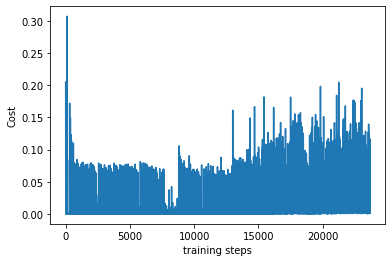

In [4]:
total_steps = 0
for i_episode in range(20):

    observation = env.reset()
    ep_r = 0
    while True:
        if total_steps > MEMORY_SIZE:
            env.render()

        action = RL.choose_action(observation)

        observation_, reward, done, _ = env.step(action)

        if done: 
            reward = 10

        RL.store_transition(observation, action, reward, observation_)

        if total_steps > MEMORY_SIZE:
            RL.learn()

        ep_r += reward
        if done:
            get = '| Get' if observation_[0] >= env.unwrapped.goal_position else '| ----'
            print('Epi: ', i_episode,
                  get,
                  '| Ep_r: ', round(ep_r, 4),
                  '| Epsilon: ', round(RL.epsilon, 2))
            break

        observation = observation_
        total_steps += 1
env.close()
RL.plot_cost()